## LSTM-FCN For Multivariate Time Series FOG Classification

In [40]:
from tsai.all import *
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleaned_data.csv')

In [159]:
p1_df_task_1 = df[(df["Patient_ID"] == 1) & (df["Task_ID"] == 1)]

In [160]:
p1_df_task_1 = pd.to_datetime(p1_df_task_1['Timestamp'])

In [186]:
locs = []

for i in range(1, 14):
    patient_id = i
    if i == 1:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 2:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 3:
        for j in range(3, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 4:
        for j in range(1, 6):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 5:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 6:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 7:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 8:
        for j in range(3, 6):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 9:
        for j in range(1, 7):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 10:
        for j in range(3, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 11:
        locs.append(patient_id, 1)
        locs.append(patient_id, 3)
        locs.append(patient_id, 4)
    if i == 12:
        for j in range(1, 5):
            task_id = j
            locs.append((patient_id, task_id))
    if i == 13:
        for j in range(3, 5):
            task_id = j
            locs.append(patient_id, task_id)

TypeError: list.append() takes exactly one argument (2 given)

In [185]:
df[df["Patient_ID"] == 13].Task_ID.value_counts()

3    36001
4    20501
Name: Task_ID, dtype: int64

In [162]:
def create_sliding_windows(dataframe):
    features_df = dataframe[['Electrooculogram', 'ECG', 'EMG_R-TA', 'EMG_L-TA', 'EMG_R-GS', 'SC', 'LS_acc_x', 'LS_acc_y', 'LS_acc_z',
       'LS_gyro_x', 'LS_gyro_y', 'LS_gyro_z', 'RS_acc_x', 'RS_acc_y',
       'RS_acc_z', 'RS_gyro_x', 'RS_gyro_y', 'RS_gyro_z', 'Waist_acc_x',
       'Waist_acc_y', 'Waist_acc_z', 'Waist_gyro_x', 'Waist_gyro_y',
       'Waist_gyro_z', 'Arm_acc_x', 'Arm_acc_y', 'Arm_acc_z', 'Arm_gyro_x',
       'Arm_gyro_y', 'Arm_gyro_z', "FoG"]]
    features = torch.tensor(features_df.values).float()
    
    # create samples with sliding window approach
    # A two second window will be 500Hz * 2 = 1000 
    window_length = 1000
    stride = None
    n_vars = 30
    get_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
    get_y = 30

    # With sliding window 50 and no overlap (stride of None)
    # 7530 samples, of 30 features, for 50 time steps in each sample

    # horizon defines the amount of look forward 
    # here it's 0 so it's predicting the next time step FoG Label

    X, y = SlidingWindow(window_length, stride=stride, get_x=get_x, get_y=get_y)(features)

    # X dims are (samples, features, time steps)
    print(f"X shape is: {X.shape}")
    # y are the FOG labels (samples,)
    print(f"y shape is: {y.shape}")
    
    return(X, y)
    

In [147]:
X, y = create_sliding_windows(p1_df_task_1)

X shape is: (180, 30, 1000)
y shape is: (180,)


In [136]:
p1_df.columns

Index(['Timestamp', 'Patient_ID', 'Task_ID', 'Electrooculogram', 'ECG',
       'EMG_R-TA', 'EMG_L-TA', 'EMG_R-GS', 'LS_acc_x', 'LS_acc_y', 'LS_acc_z',
       'LS_gyro_x', 'LS_gyro_y', 'LS_gyro_z', 'RS_acc_x', 'RS_acc_y',
       'RS_acc_z', 'RS_gyro_x', 'RS_gyro_y', 'RS_gyro_z', 'Waist_acc_x',
       'Waist_acc_y', 'Waist_acc_z', 'Waist_gyro_x', 'Waist_gyro_y',
       'Waist_gyro_z', 'Arm_acc_x', 'Arm_acc_y', 'Arm_acc_z', 'Arm_gyro_x',
       'Arm_gyro_y', 'Arm_gyro_z', 'SC', 'FoG'],
      dtype='object')

In [141]:
p1_df

,Timestamp,Patient_ID,Task_ID,Electrooculogram,ECG,EMG_R-TA,EMG_L-TA,EMG_R-GS,LS_acc_x,LS_acc_y,...,Waist_gyro_y,Waist_gyro_z,Arm_acc_x,Arm_acc_y,Arm_acc_z,Arm_gyro_x,Arm_gyro_y,Arm_gyro_z,SC,FoG
0,12:20:48,1,4,-58.5,131.5,102.0,-152.5,245.5,8401.000000,164.000000,...,12.000000,11.000000,5135.000000,-5135.000000,2778.000000,26.000000,108.000000,19.000000,1708.000000,0
1,12:20:48.002,1,4,-58.5,204.5,162.0,-94.0,301.0,8398.502983,166.952529,...,8.772836,11.299420,5132.202773,-5126.697394,2775.918864,26.866966,108.185406,19.769319,1707.998975,0
2,12:20:48.004,1,4,-58.5,286.0,203.0,-42.5,352.5,8392.935729,167.778560,...,4.579622,11.381927,5129.861121,-5114.943084,2773.516823,27.614395,108.466146,20.430155,1707.997919,0
3,12:20:48.006,1,4,-59.0,333.5,221.5,-35.5,355.0,8385.716982,165.428327,...,-0.200011,11.314723,5127.518084,-5101.740077,2771.455351,28.228341,108.754184,21.006331,1707.997375,0
4,12:20:48.008,1,4,-58.5,355.0,241.0,-49.5,384.0,8378.265490,158.852062,...,-5.186429,11.165013,5124.716697,-5089.091381,2770.395920,28.694858,108.961481,21.521672,1707.997888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376499,12:20:37.992,1,3,-29.5,61.5,721.0,270.5,1565.0,8356.659177,-445.989061,...,42.975923,19.764626,4640.999157,-4861.680107,3704.782198,23.877110,64.927614,-19.012220,1717.000808,0
376500,12:20:37.994,1,3,-27.5,28.0,727.0,249.0,1586.0,8348.061184,-446.781843,...,35.925758,19.384786,4650.764017,-4819.183379,3734.388081,30.282646,61.882151,-16.857417,1717.001640,0
376501,12:20:37.996,1,3,-26.5,-2.5,745.0,221.5,1611.5,8341.333603,-447.580094,...,27.287632,18.922632,4659.229299,-4778.146597,3760.602865,34.849627,59.172881,-14.696505,1717.002069,0
376502,12:20:37.998,1,3,-27.0,-32.5,768.5,198.5,1644.0,8337.604015,-447.585564,...,18.499670,18.440319,4665.329720,-4743.206544,3782.211766,37.211072,57.109074,-12.690395,1717.001665,0


In [139]:
p1_df = pd.to_datetime(p1_df['Timestamp'])

In [140]:
p1_df_time

0        2022-11-29 12:20:48.000
1        2022-11-29 12:20:48.002
2        2022-11-29 12:20:48.004
3        2022-11-29 12:20:48.006
4        2022-11-29 12:20:48.008
                   ...          
376499   2022-11-29 12:20:37.992
376500   2022-11-29 12:20:37.994
376501   2022-11-29 12:20:37.996
376502   2022-11-29 12:20:37.998
376503   2022-11-29 12:20:38.000
Name: Timestamp, Length: 376504, dtype: datetime64[ns]

In [131]:
features.shape

torch.Size([180501, 31])

X shape is: (3610, 30, 50)
y shape is: (3610,)


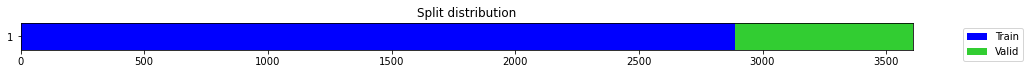

In [133]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)

In [142]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [111]:
y[0]

0.0

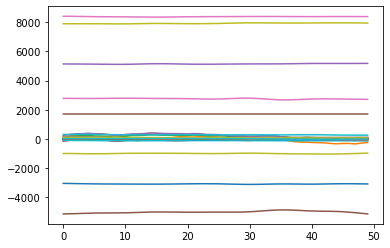

In [109]:
plt.plot(Y[0].T);

In [19]:
p1_df["Timestamp"]

0             12:20:48
1         12:20:48.002
2         12:20:48.004
3         12:20:48.006
4         12:20:48.008
              ...     
376499    12:20:37.992
376500    12:20:37.994
376501    12:20:37.996
376502    12:20:37.998
376503        12:20:38
Name: Timestamp, Length: 376504, dtype: object

In [22]:
df[df["Patient_ID"] == 2]

,Timestamp,Patient_ID,Task_ID,Electrooculogram,ECG,EMG_R-TA,EMG_L-TA,EMG_R-GS,LS_acc_x,LS_acc_y,...,Waist_gyro_y,Waist_gyro_z,Arm_acc_x,Arm_acc_y,Arm_acc_z,Arm_gyro_x,Arm_gyro_y,Arm_gyro_z,SC,FoG
376504,10:44:20,2,4,8.5,-127.5,-4170.0,-3677.0,1656.0,0.0,0.0,...,42.000000,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
376505,10:44:20.002,2,4,16.5,-189.0,-4092.0,-3663.0,1648.5,0.0,0.0,...,42.757608,25.958145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
376506,10:44:20.004,2,4,22.0,-186.5,-4038.5,-3672.0,1643.5,0.0,0.0,...,43.377309,27.906051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
376507,10:44:20.006,2,4,23.0,-143.5,-4019.5,-3697.5,1638.5,0.0,0.0,...,44.318206,29.774883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
376508,10:44:20.008,2,4,21.5,-101.0,-4039.0,-3730.5,1634.0,0.0,0.0,...,46.039402,31.495810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645003,10:44:07.992,2,3,11.5,256.5,1618.5,-146.5,2963.5,0.0,0.0,...,69.284610,10.222773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
645004,10:44:07.994,2,3,10.0,217.0,1722.5,-134.5,1635.0,0.0,0.0,...,73.529195,10.474578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
645005,10:44:07.996,2,3,5.5,230.0,1898.5,-205.5,1850.0,0.0,0.0,...,78.031475,10.714995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
645006,10:44:07.998,2,3,1.0,227.5,2048.0,-320.0,1670.5,0.0,0.0,...,82.089170,10.903608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
